In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# # pwd
# os.chdir('..')
# all_df = pd.read_csv('/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/data/all_data.csv')

cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [4]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"{root_directory}/data/all_data.csv")
# # data_save/all_data_map-len30.csv
# df_all = pd.read_csv(f"{root_directory}/data_save/all_data_map-len30.csv")

# checlk if the plot folder exists
if not os.path.exists(f"{root_directory}/data_analysis/plots"):
    print("Creating plots folder")
    os.mkdir(f"{root_directory}/data_analysis/plots")
else:
    print("plots folder exists")

df_all.info()

plots folder exists
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10280737 entries, 0 to 10280736
Data columns (total 33 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   area_percent    float64
 2   update_time     float64
 3   delta_time      float64
 4   plan_length     int64  
 5   replan_count    int64  
 6   logging_time    float64
 7   frame_count     int64  
 8   known_area      int64  
 9   success         bool   
 10  seed            int64  
 11  draw_sim        bool   
 12  log_plots       bool   
 13  use_threads     bool   
 14  n_bots          int64  
 15  grid_thickness  int64  
 16  screen_width    int64  
 17  screen_height   int64  
 18  min_room_size   int64  
 19  max_room_size   int64  
 20  wall_ratio      float64
 21  method          object 
 22  start_scenario  object 
 23  goal_scenario   object 
 24  experiment_ID   int64  
 25  loss_type       object 
 26  execution_date  object 
 27  epsilon_0       flo

In [5]:
df_all.shape

(10280737, 33)

In [6]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(10280737, 27)

In [7]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



In [8]:
df_all.describe()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Seed,N Bots,Grid Thickness,Screen Width,Screen Height,Min Room Size,Max Room Size,Wall Ratio,Experiment Id
count,1.028074e+07,1.028074e+07,1.028074e+07,1.028074e+07,1.028074e+07,1.028074e+07,1.028074e+07,1.028074e+07,1.028074e+07,1.028074e+07,1.028074e+07,10280737.0,10280737.0,10280737.0,1.028074e+07,10280737.0,1.028074e+07,1.028074e+07
mean,5.140368e+06,7.515059e-01,1.640834e-02,1.320151e+00,3.885632e+01,8.579193e+01,1.987834e-04,1.040061e+02,6.763553e+02,5.977628e+01,3.503914e+00,10.0,300.0,300.0,6.041801e+01,200.0,2.333201e-01,3.451332e+04
std,2.967793e+06,2.610737e-01,2.281363e-02,9.798280e-01,2.770952e+01,7.417813e+01,1.395822e-03,9.391812e+01,2.349663e+02,1.729156e+01,1.598238e+00,0.0,0.0,0.0,1.635222e+01,0.0,4.091313e-02,1.938141e+04
min,0.000000e+00,1.111111e-03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+01,2.000000e+00,10.0,300.0,300.0,4.000000e+01,200.0,1.577778e-01,0.000000e+00
25%,2.570184e+06,5.922222e-01,1.000000e-02,5.300000e-01,1.900000e+01,3.900000e+01,0.000000e+00,3.700000e+01,5.330000e+02,4.500000e+01,2.000000e+00,10.0,300.0,300.0,4.000000e+01,200.0,1.955556e-01,1.827300e+04
50%,5.140368e+06,8.488889e-01,1.000000e-02,1.140000e+00,3.200000e+01,7.100000e+01,0.000000e+00,7.800000e+01,7.640000e+02,6.000000e+01,4.000000e+00,10.0,300.0,300.0,6.000000e+01,200.0,2.266667e-01,3.479900e+04
75%,7.710552e+06,9.744444e-01,2.000000e-02,1.920000e+00,5.200000e+01,1.150000e+02,0.000000e+00,1.420000e+02,8.770000e+02,7.500000e+01,4.000000e+00,10.0,300.0,300.0,8.000000e+01,200.0,2.777778e-01,5.249500e+04
max,1.028074e+07,1.000000e+00,6.000000e-01,1.045000e+01,3.470000e+02,1.992000e+03,1.000000e-02,8.990000e+02,9.000000e+02,8.900000e+01,6.000000e+00,10.0,300.0,300.0,8.000000e+01,200.0,3.133333e-01,6.803900e+04


In [9]:
# conver columns to category that have less than 10 unique values
for col in df_all.columns:
    if df_all[col].nunique() < 20:
        df_all[col] = df_all[col].astype('category')

In [10]:
df_all['Method'].value_counts()

Frontier Random                  1304048
Voronoi Frontier Random           895394
Unknown Random                    893323
Gametheory                        878058
Decay Epsilon Greedy Frontier     836662
Voronoi Frontier Help Random      797882
Epsilon Greedy Frontier           699198
Frontier Closest                  682457
Decay Epsilon Greedy Unknown      610287
Decision Frontier Closest         609717
Epsilon Greedy Unknown            554114
Voronoi Frontier Closest          513486
Unknown Closest                   513096
Voronoi Frontier Help Closest     493015
Name: Method, dtype: int64

In [11]:
df_all.columns
# '''
# 'Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
#        'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
#        'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
#        'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
#        'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
#        'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
#        'Execution Date']
#        '''

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
       'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
       'Execution Date'],
      dtype='object')

In [12]:
df_all.groupby(['Method']).max()[['Frame Count', 'Delta Time']]

/tmp/ipykernel_3058961/645098533.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_all.groupby(['Method']).max()[['Frame Count', 'Delta Time']]


,Frame Count,Delta Time
Method,,
Decay Epsilon Greedy Frontier,899,5.54
Decay Epsilon Greedy Unknown,376,7.23
Decision Frontier Closest,652,8.44
Epsilon Greedy Frontier,459,5.25
Epsilon Greedy Unknown,348,5.89
Frontier Closest,410,6.02
Frontier Random,899,9.53
Gametheory,597,5.41
Unknown Closest,377,10.45


In [13]:
# # The average frame_count for each method
# df_all.groupby(['Method']).max()['Frame Count', 'Delta Time'].sort_values().apply(lambda x: ','+str(int(x))).to_frame()

In [14]:
df_all.groupby(['Experiment Id']).max()

/tmp/ipykernel_3058961/168644692.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_all.groupby(['Experiment Id']).max()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Frame Count,Known Area,Seed,Wall Ratio
Experiment Id,,,,,,,,,,
0,1969,1.0,0.08,1.60,49,70,178,900,30,0.273333
1,15987,1.0,0.10,2.93,50,91,313,900,30,0.224444
2,9871,1.0,0.11,2.40,53,59,253,900,30,0.187778
3,7901,1.0,0.10,2.64,50,85,282,900,31,0.274444
4,9368,1.0,0.12,2.49,59,80,265,900,31,0.243333
...,...,...,...,...,...,...,...,...,...,...
68035,10280736,1.0,0.13,3.07,172,248,88,900,88,0.228889
68036,10280365,1.0,0.09,2.42,135,199,88,900,88,0.196667
68037,10280045,1.0,0.10,1.94,145,172,60,900,89,0.277778


In [32]:
df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])
# drop any row Success == False
df_end = df_end[df_end['Success'] == True]
df_end

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Success,...,Screen Height,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,Execution Date
1969,1969,1.0,0.04,1.60,11,70,0.0,178,900,True,...,300,40,200,0.273333,Unknown Random,Rand_Start_Position,Rand_Start_Goal,0,Agent,2023-04-20 01:36:43
9871,9871,1.0,0.00,2.40,14,59,0.0,253,900,True,...,300,80,200,0.187778,Unknown Random,Rand_Start_Position,Rand_Start_Goal,2,Agent,2023-04-20 01:36:43
7901,7901,1.0,0.03,2.64,4,85,0.0,282,900,True,...,300,40,200,0.274444,Unknown Random,Rand_Start_Position,Rand_Start_Goal,3,Agent,2023-04-20 01:36:43
25143,25143,1.0,0.04,3.27,3,86,0.0,322,900,True,...,300,80,200,0.191111,Unknown Random,Rand_Start_Position,Rand_Start_Goal,5,Agent,2023-04-20 01:36:43
21856,21856,1.0,0.02,3.37,10,76,0.0,363,900,True,...,300,80,200,0.193333,Unknown Random,Rand_Start_Position,Rand_Start_Goal,8,Agent,2023-04-20 01:36:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280736,10280736,1.0,0.02,3.07,20,248,0.0,88,900,True,...,300,60,200,0.228889,Decision Frontier Closest,Center_Start_Position,Rand_Start_Goal,68035,Disrepair,2023-04-20 01:36:43
10280365,10280365,1.0,0.05,2.42,42,199,0.0,88,900,True,...,300,80,200,0.196667,Decision Frontier Closest,Center_Start_Position,Rand_Start_Goal,68036,Disrepair,2023-04-20 01:36:43
10280045,10280045,1.0,0.06,1.94,139,172,0.0,60,900,True,...,300,40,200,0.277778,Decision Frontier Closest,Center_Start_Position,Rand_Start_Goal,68037,Disrepair,2023-04-20 01:36:43
10279601,10279601,1.0,0.03,1.93,23,206,0.0,60,900,True,...,300,60,200,0.207778,Decision Frontier Closest,Center_Start_Position,Rand_Start_Goal,68038,Disrepair,2023-04-20 01:36:43


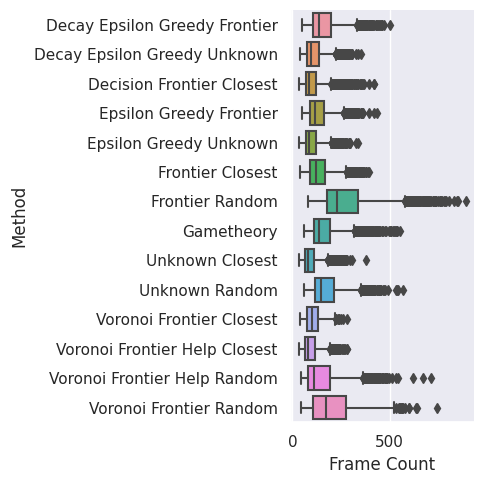

In [33]:
sns.catplot(y="Method", x="Frame Count", kind="box", data=df_end)
plt.savefig(f"{root_directory}/data_analysis/plots/boxplot_frame_count.png")

In [60]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_core',
 '_decorators',
 '_docstrings',
 '_oldcore',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load

In [82]:
if type(sns.barplot) == type(plt.plot):
    print("yes")

yes


In [115]:
from inspect import signature
def test_sns_polots(df, x, y, hue, save_name=None):
    if save_name is None:
        save_name = f"{x}_{y}_{hue}"
    
    compatable_sns_plots =[]    
    for sns_func in dir(sns):
        if 'plot' not in sns_func:
            continue

        if type(sns.__getattribute__(sns_func)) != type(plt.plot):
            print(f"{sns_func} is not a plot")
            continue

        args = signature( sns.__getattribute__(sns_func)).parameters.keys()
        # make sure args is an odict_keys object
        if type(args) == type(dict().keys()):
            args = list(args)

        if 'countplot' == sns_func:
            continue

        if 'x' in args and 'y' in args and 'hue' in args and 'data' in args:
            compatable_sns_plots.append(sns.__getattribute__(sns_func))
        
    
    for sns_plot in compatable_sns_plots:
        print(sns_plot)
        # continue
        try:
                
            sns_plot(x=x, y=y, hue=hue, data=df)
            plt.savefig(f"{root_directory}/data_analysis/plots/run/{save_name}_{sns_plot.__name__}.png")
            plt.clf()
        except:
            print(f"{sns_plot.__name__} failed")
            continue
        
print(signature(test_sns_polots))

(df, x, y, hue, save_name=None)


In [116]:
test_sns_polots(df=df_end, x='Frame Count', y='Method', hue='Method')

miscplot is not a plot
<function barplot at 0x7f86c74bcd30>
<function boxenplot at 0x7f86c74bcb80>
<function boxplot at 0x7f86c74bca60>
<function catplot at 0x7f86c74bcee0>
<function displot at 0x7f86c747adc0>
<function ecdfplot at 0x7f86c747aca0>
ecdfplot failed
<function histplot at 0x7f86c747a280>
<function jointplot at 0x7f86c748db80>
jointplot failed
<function kdeplot at 0x7f86c747ac10>
kdeplot failed
<function lineplot at 0x7f86c748dc10>
<function lmplot at 0x7f86c748f430>
lmplot failed
<function pointplot at 0x7f86c74bcdc0>
<function relplot at 0x7f86c748f0d0>
<function rugplot at 0x7f86c747ad30>
<function scatterplot at 0x7f86c748f040>
<function stripplot at 0x7f86c74bcc10>
<function swarmplot at 0x7f86c74bcca0>


/home/direct-lab/anaconda3/envs/multi_agent/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 99.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


swarmplot failed
<function violinplot at 0x7f86c74bcaf0>
violinplot failed


In [ ]:
grd = sns.catplot(
    data=df_end, x="Frame Count", y="Method", hue="N Bots",
    col="Loss Type", col_wrap=1,
    kind="bar", #bw=.25, cut=0, linewidth=0,
    height=6, aspect=1.5, 
)
# mkae the fige bigger
# grd.fig.set_size_inches(15, 6)
plt.savefig(f"{root_directory}/data_analysis/plots/boxplot_frame_count.png")


ValueError: Plot kind 'displot' is not recognized

In [ ]:
df_all.groupby(['Method','Experiment Id']).max()

In [ ]:
sns.kdeplot(, x='Frame Count', hue='Method',ax=ax, fill=True, common_norm=False, alpha=.1, linewidth=1)

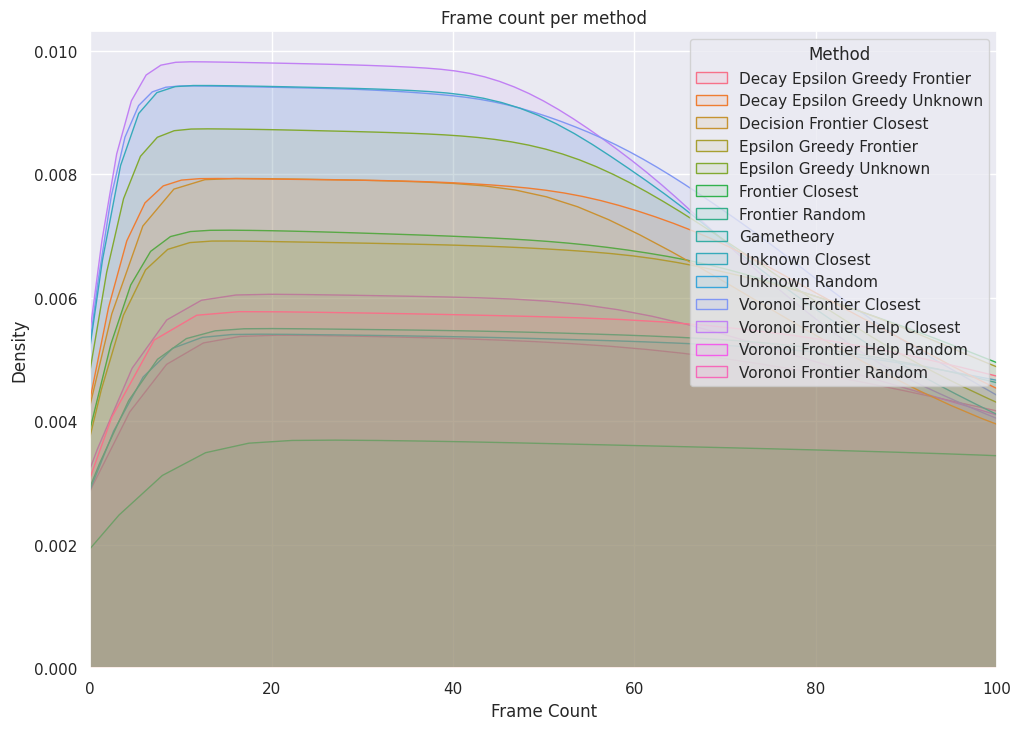

In [44]:
fig, ax = plt.subplots()
sns.kdeplot(df_all, x='Frame Count', hue='Method',ax=ax, fill=True, common_norm=False, alpha=.1, linewidth=1)
ax.set_title('Frame count per method')
# set x range
ax.set_xlim(0, 100)

# ÷save the figure
fig.savefig(f"{root_directory}/data_analysis/plots/frame_count_per_method.png")

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df_all, x='Frame Count', hue='Loss Type',ax=ax, fill=True, common_norm=False, alpha=.1, linewidth=1)
ax.set_title('Frame count per method')
# set x range
# ax.set_xlim(0, 100)

In [ ]:
# fig, ax = plt.subplots()
# sns.kdeplot(df_all.sample(1000), x="Frame Count", y="Area Percent",
#               style="Method",
#               hue="Loss Type",
#               aphla=0.01, linewidth=1,
#               # fill=True,
#             # thresh=0, levels=5, cmap="mako"
#             )

# sns.lineplot(df_all.sample(1000), x="Frame Count", y="Area Percent", 
#               hue="Loss Type",
#             #   fill=True,
#             # thresh=0, levels=5, cmap="mako"
#             )

# ax.set_title('Frame count per method')
# # set x range
# ax.set_xlim(0, 100)
# ax.set_ylim(0, 1)

In [ ]:
samples_len = df_all.shape[0]//100
samples_len

In [ ]:
g = sns.FacetGrid(df_all.sample(samples_len), col="Loss Type", col_wrap=3, height=4, aspect=1.5)

# Map scatterplot to the FacetGrid
g.map(sns.kdeplot, 
      'Frame Count', 
      hue='Method',
      fill=True, #thresh=0, levels=100, cmap="mako"
      )

In [ ]:
g = sns.JointGrid(data=df_all.sample(samples_len), y="Delta Time", x="Frame Count",hue='Loss Type', space=0)
g.plot_joint(sns.kdeplot,
            #  fill=True,
             thresh=0, levels=100, alpha=0.25, linewidth=1)
g.plot_marginals(sns.histplot, alpha=0.25, bins=100)
g.plot_marginals(sns.kdeplot,alpha=1, )

# set x range
# g.ax_joint.set_xlim(0, 200)

In [ ]:
# sns.relplot(
#     data=df_all,
#     x="Frame Count", y="Logging Time", hue="Method",col="Loss Type", col_wrap=3,
#     kind="line", ci="sd", palette="dark", alpha=.1, linewidth=1.5, height=6, aspect=1.5
# )

In [ ]:
df_all

In [ ]:
sns.pairplot(df_all.sample(samples_len)['Frame Count', 'Delta Time', 'Area Percent', 'Method', 'Loss Type'],
             hue='Method', corner=True, diag_kind='kde', height=2.5, aspect=1.5)